This notebook implements some of the calculations from Section 4 of the paper. 

Importantly, this notebook has a few dependencies: 
- The full TNO catalog (including the flux chains) from https://github.com/bernardinelli/des_tno_catalog. A new version of the catalog, that includes the free inclinations from [Huang et al (2022)](doi.org/10.3847/1538-4365/ac559a) is included
- The `gmm_anyk` package from https://github.com/bernardinelli/gmm_anyk
- All dependencies from the likelihood software (`numpy`, `numba`, `jax`, `astropy`, `scipy`) and `getDist` for visualizing chains. Ternary plots towards the end also require `mpltern`

In [1]:
import astropy.table as tb 
import sys
import matplotlib.pyplot as pl 
import numpy as np
tno = tb.Table.read('data/y6_goodsample_ifree.fits')
sys.path.append('../Code')
sys.path.append('../Code/Scripts')

from getdist import plots, MCSamples


Let's load the files in a smart way first

In [59]:
import glob 

files = glob.glob('../Chains/Honly/*H.npz') #finding all files 

f = {'shared' : {}, 'distinct' : {}}
theta = {'shared' : {}, 'distinct' : {}}

for i in files:
    sp = i.split('/')[-1].split('.')[0]
    if sp.split('_')[1] == 'oneH':
        group = 'shared'
    else:
        group = 'distinct'
    sp = sp.split('_')[0]
    ch = np.load(i)
    f[group][sp] = ch['f']
    theta[group][sp] = ch['theta']

In [12]:
f['shared'].keys()

dict_keys(['ckbohkbodetachedscatteringtrojaninnerbeltplutinomainbelttwotinodistantfivetwo', 'ckbohkbodetachedscatteringresonant', 'ckbo'])

In [16]:
labels = [r'\theta', r"\theta'", r'\bar{A}',r's']
names = ['slope', 'roll', 'abar', 's']

samples_nirb = {} 
samples_nirf = {} 
for i in theta['distinct']:

	samples_nirb[i] = MCSamples(samples=theta['distinct'][i][:,:4], names = names, labels = labels, label='NIRB ' + i)
	samples_nirf[i] = MCSamples(samples=theta['distinct'][i][:,4:8], names = names, labels = labels, label='NIRF ' + i)

samples_cc = MCSamples(samples=theta['shared']['ckbo'][:,[0,1,4,5]], names = names, labels = labels, label='CC')
samples_shared = MCSamples(samples=theta['shared']['ckbohkbodetachedscatteringresonant'][:,[0,1]], names = names[:2], labels = labels[:2], label='Shared')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Let's reproduce Figure 5 of the paper

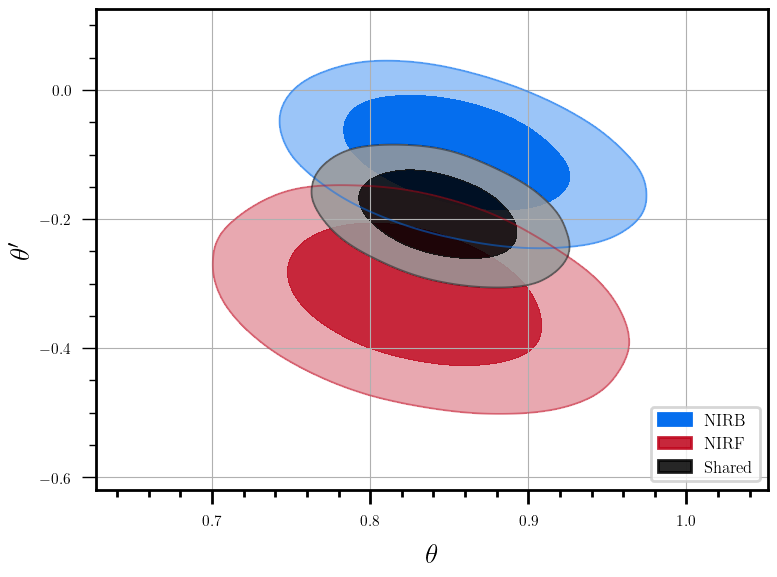

In [18]:
g = plots.get_single_plotter(width_inch=8, )
g.settings.axes_labelsize = 20
g.settings.fontsize = 20
g.plot_2d([samples_nirb['ckbohkbodetachedscatteringresonant'], samples_nirf['ckbohkbodetachedscatteringresonant'], samples_shared],'slope', 'roll', filled=True, colors=['xkcd:cerulean blue', 'xkcd:scarlet', 'k', 'xkcd:light orange', 'xkcd:forest green'],)
pl.grid()
g.add_legend(['NIRB', 'NIRF', 'Shared'], legend_loc=4)
pl.show()

In [14]:
leg = {'ckbo' : 'CC', 'hkbo' : 'HC', 'detached' : 'Detached', 'scattering' : 'Scattering', 'resonant' : 'Resonant', 'ckbohkbodetachedscatteringresonant' : 'All'}

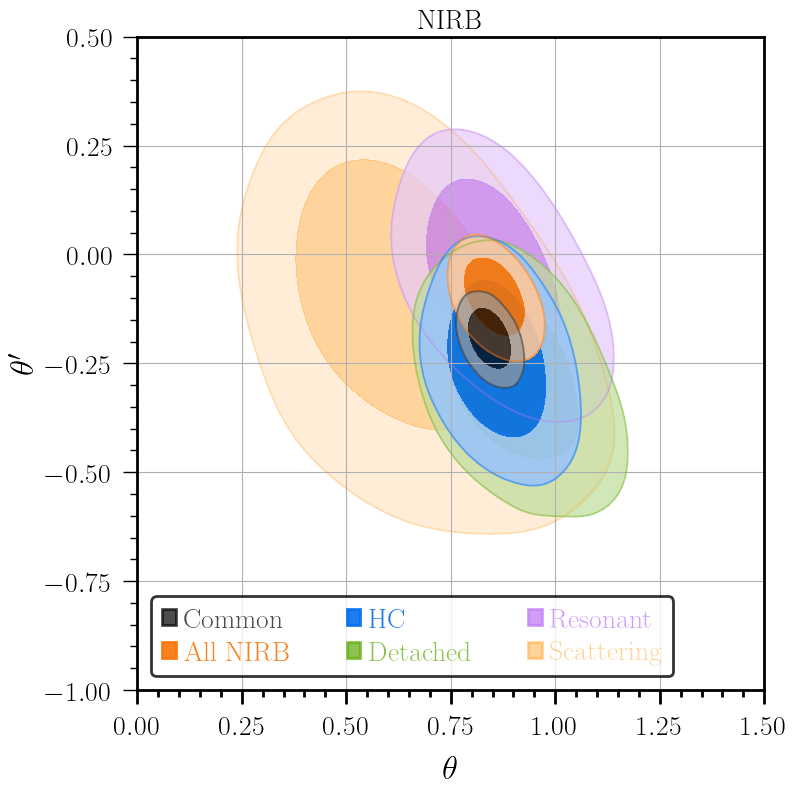

In [21]:
g = plots.get_subplot_plotter(width_inch=8, )
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.legend_fontsize=20
g.plot_2d([samples_nirb['scattering'], samples_nirb['resonant'], samples_nirb['detached'], samples_nirb['hkbo'],samples_nirb['ckbohkbodetachedscatteringresonant'], samples_shared],'slope', 'roll', filled=[True, True, True, True, True, True],
               colors=['xkcd:tangerine', 'xkcd:light purple','xkcd:leaf green', 'xkcd:cerulean blue', 'xkcd:orange', 'k'], alphas=[0.4, 0.7, 0.7, 0.9, 0.9, 0.7],lims=[0,1.5,-1, 0.5])
g.add_legend(['Scattering','Resonant', 'Detached', 'HC', 'All NIRB', 'Common'], colored_text=False, legend_ncol=3, legend_loc=3, label_order=-1,frameon=True, fancybox=True,framealpha=0.8, edgecolor='k', labelcolor='linecolor', handlelength=0.5, handleheight=0.5,handletextpad=0.3, labelspacing=0.3)
pl.grid()
pl.title('NIRB',fontsize=20)
pl.xticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5])
pl.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5])

pl.show()

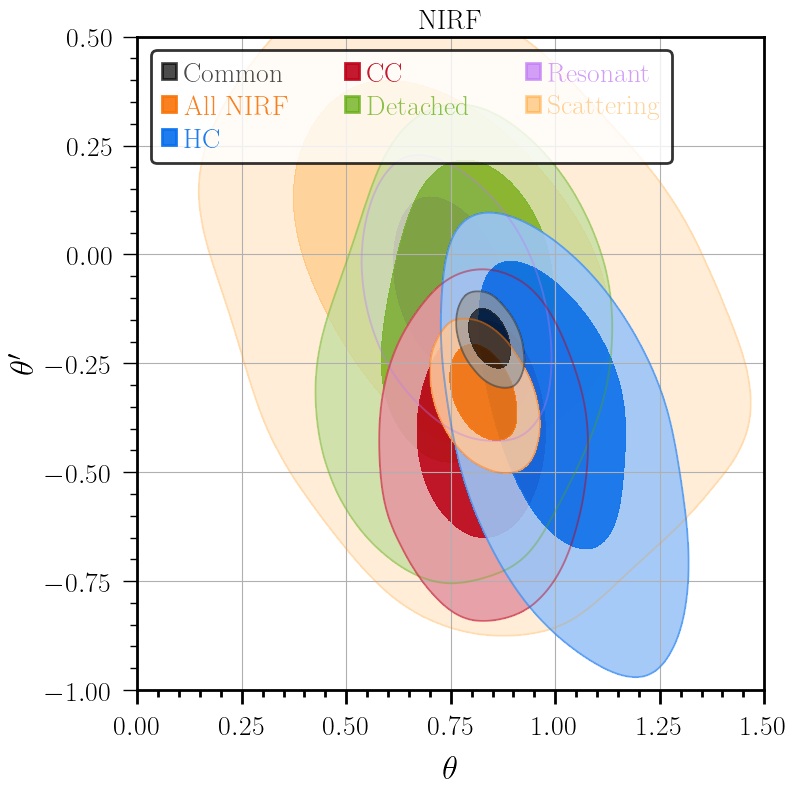

In [22]:
g = plots.get_subplot_plotter(width_inch=8, )
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.legend_fontsize=20
g.plot_2d([samples_nirf['scattering'], samples_nirf['resonant'], samples_nirf['detached'], samples_nirf['ckbo'], samples_nirf['hkbo'],samples_nirf['ckbohkbodetachedscatteringresonant'], samples_shared],'slope', 'roll', filled=True,
               colors=['xkcd:tangerine', 'xkcd:light purple','xkcd:leaf green', 'xkcd:scarlet','xkcd:cerulean blue', 'xkcd:orange', 'k'], alphas=[0.4, 0.7, 0.7, 0.9, 0.9, 0.9, 0.7],lims=[0,1.5,-1, 0.5])
g.add_legend(['Scattering','Resonant', 'Detached', 'CC', 'HC', 'All NIRF', 'Common'], colored_text=False, legend_ncol=3, legend_loc=2, label_order=-1,frameon=True, fancybox=True,framealpha=0.8, edgecolor='k', labelcolor='linecolor', handlelength=0.5, handleheight=0.5,handletextpad=0.3, labelspacing=0.3)
pl.grid()
pl.xticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5])
pl.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5])
pl.title('NIRF', fontsize=20)

pl.show()

Let's also reproduce Figure 4

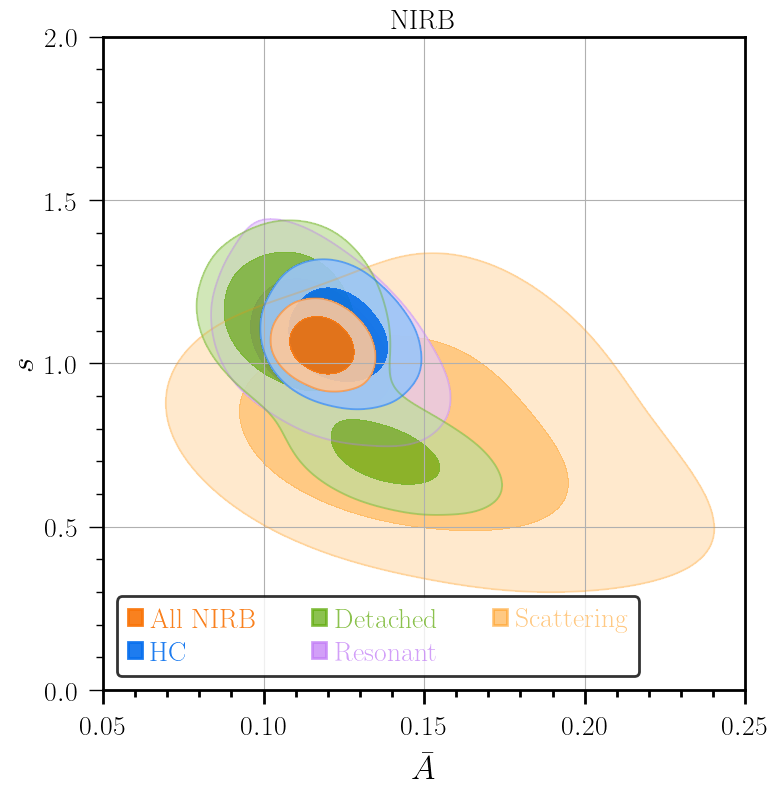

In [23]:
g = plots.get_subplot_plotter(width_inch=8, subplot_size_ratio=1)
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.legend_fontsize=20
g.plot_2d([samples_nirb['scattering'], samples_nirb['resonant'], samples_nirb['detached'], samples_nirb['hkbo'],samples_nirb['ckbohkbodetachedscatteringresonant'],],'abar', 's', filled=[True, True, True, True, True, True], colors=['xkcd:tangerine', 'xkcd:light purple','xkcd:leaf green', 'xkcd:cerulean blue', 'xkcd:orange', 'k'], alphas=[0.5, 0.7, 0.7, 0.9, 0.9, 0.7],lims=[0.05, 0.25, 0, 2])
g.add_legend(['Scattering','Resonant', 'Detached', 'HC', 'All NIRB'], colored_text=False, legend_ncol=3, legend_loc=3, label_order=-1,frameon=True, fancybox=True,framealpha=0.8, edgecolor='k', labelcolor='linecolor', handlelength=0.5, handleheight=0.5,handletextpad=0.3, labelspacing=0.3)
pl.grid()
#pl.xticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5])
#pl.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5])
#pl.xlim(0.05, 0.25)
#pl.ylim(0,2)
pl.title('NIRB',fontsize=20)

g.tight_layout = True
pl.show()

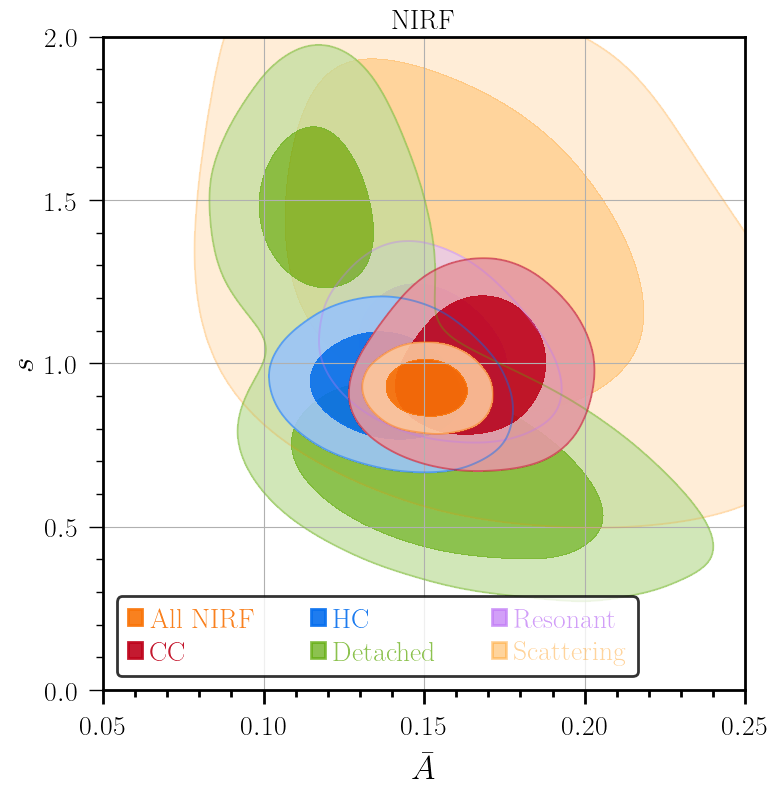

In [24]:
g = plots.get_subplot_plotter(width_inch=8, subplot_size_ratio=1)

g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.legend_fontsize=20
g.plot_2d([samples_nirf['scattering'], samples_nirf['resonant'], samples_nirf['detached'], samples_nirf['hkbo'], samples_nirf['ckbo'], samples_nirf['ckbohkbodetachedscatteringresonant'],],'abar', 's', filled=True,
               colors=['xkcd:tangerine', 'xkcd:light purple','xkcd:leaf green', 'xkcd:cerulean blue','xkcd:scarlet', 'xkcd:orange', 'k'], alphas=[0.4, 0.7, 0.7, 0.9, 0.9, 0.9, 0.7], lims=[0.05, 0.25, 0, 2])
g.add_legend(['Scattering','Resonant', 'Detached', 'HC', 'CC', 'All NIRF',], colored_text=False, legend_ncol=3, legend_loc=3, label_order=-1,frameon=True, fancybox=True,framealpha=0.8, edgecolor='k', labelcolor='linecolor', handlelength=0.5, handleheight=0.5,handletextpad=0.3, labelspacing=0.3)
pl.grid()
pl.title('NIRF', fontsize=20)
g.tight_layout = True

pl.show()

Let's reproduce Figure 7

In [60]:
f['shared']['ckbohkbodetachedscatteringtrojaninnerbeltplutinomainbelttwotinodistantfivetwo']

array([[0.01175716, 0.48610384, 0.1124072 , ..., 0.01228668, 0.01653682,
        0.00201078],
       [0.01288679, 0.4362859 , 0.10042495, ..., 0.01726864, 0.02268727,
        0.00718254],
       [0.02307714, 0.46249923, 0.10952646, ..., 0.01296212, 0.01813986,
        0.00352901],
       ...,
       [0.00485885, 0.48082612, 0.10900791, ..., 0.01050352, 0.01980306,
        0.00387271],
       [0.00119943, 0.43631257, 0.12046735, ..., 0.02878498, 0.02106645,
        0.00228189],
       [0.01696055, 0.41524358, 0.11827202, ..., 0.03539681, 0.01745365,
        0.00610918]])

In [61]:
pops = ['ckbo', 'hkbo', 'detached', 'scattering', 'trojan', 'innerbelt', 'plutino', 'mainbelt', 'twotino', 'distant', 'fivetwo']

f_perclass = {}
for i in range(len(pops)):
    ff = f['shared']['ckbohkbodetachedscatteringtrojaninnerbeltplutinomainbelttwotinodistantfivetwo'][:,[2*i, 2*i+1]]
    f_perclass[pops[i]] = ff[:,0]/(ff[:,0] + ff[:,1])

In [63]:
for i in f_perclass:
    print(i, np.mean(f_perclass[i]), np.std(f_perclass[i]))

ckbo 0.018747432313171226 0.015513811336885052
hkbo 0.6305628029877006 0.0345535720883292
detached 0.7105003691627261 0.04569243002445692
scattering 0.6871285920627521 0.09095002606205417
trojan 0.6820977037608191 0.15648825904964456
innerbelt 0.5521959685815083 0.13853305028966645
plutino 0.5604395792092044 0.07531195597484694
mainbelt 0.2792854434788798 0.07532106430021006
twotino 0.40774265772403173 0.12530338793155618
distant 0.6142871819345466 0.0913287757765343
fivetwo 0.7918500711477706 0.11075380381680157


In [64]:
samp_f = {}

for i in f_perclass:
    samp_f[i] = MCSamples(samples = f_perclass[i], names = ['f'], labels = ['f'], label=i, ranges={'f':[0,1]})

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [65]:
fplot = np.linspace(0, 1, 10000)
fplot

array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])

In [66]:
cmap = pl.get_cmap('coolwarm')

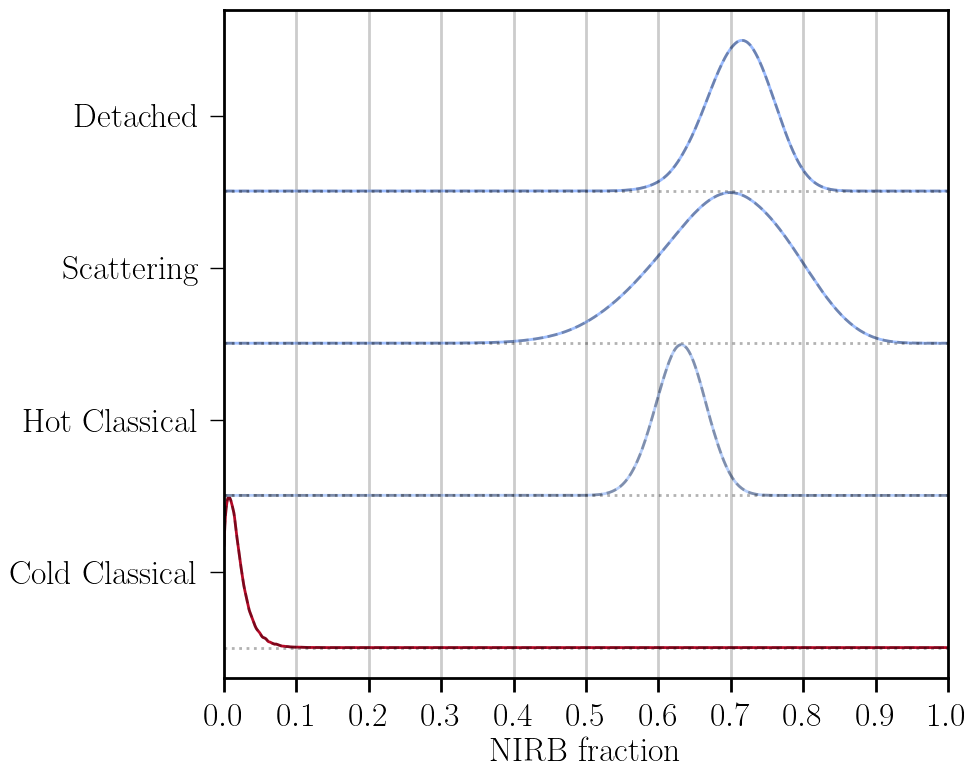

In [67]:
peaks = []

off = 0
for i in ['ckbo', 'hkbo', 'scattering', 'detached']:
	scale = 1
	if i in ['ckbo']:
		scale = 1

	dens_f = samp_f[i].get1DDensity('f')(fplot)
	pl.plot(fplot, dens_f/scale + off, color = cmap(1-fplot[np.argmax(dens_f)]))
	pl.plot(fplot,dens_f/scale + off, 'k--', alpha=0.3)

	pl.axhline(np.min(dens_f/scale + off ), alpha=0.3, color='k', linestyle=':')
	peaks.append((np.max(dens_f/scale) - np.min(dens_f/scale))/2 + off )
	off += np.max(dens_f/scale) + 0.01
pl.xlim(0,1)
pl.yticks(np.array(peaks), [r'Cold Classical', 'Hot Classical', 'Scattering', 'Detached'])
pl.xlabel('NIRB fraction')
pl.tight_layout()
for i in range(1,10):
    pl.axvline(i/10, alpha=0.2, linestyle='-')
pl.xticks(np.linspace(0,1., 11))
pl.minorticks_off()

pl.show()

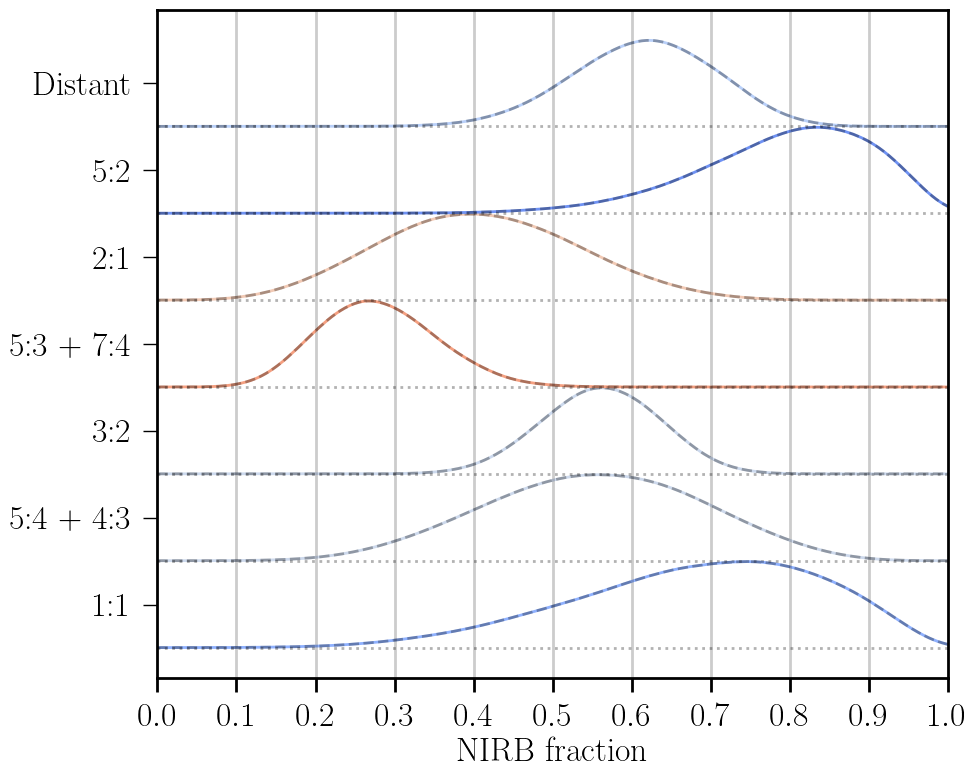

In [68]:
peaks = []

off = 0
for i in ['trojan', 'innerbelt', 'plutino', 'mainbelt', 'twotino', 'fivetwo', 'distant']:
	dens_f = samp_f[i].get1DDensity('f')(fplot)
	pl.plot(fplot, dens_f + off, color = cmap(1-fplot[np.argmax(dens_f)]))
	pl.plot(fplot,dens_f + off, 'k--', alpha=0.3)

	pl.axhline(np.min(dens_f + off ), alpha=0.3, color='k', linestyle=':')
	peaks.append((np.max(dens_f) - np.min(dens_f))/2 + off )
	off += np.max(dens_f) + 0.01
pl.xlim(0,1)
pl.yticks(np.array(peaks), [r'1:1','5:4 + 4:3', '3:2', '5:3 + 7:4', '2:1', '5:2', r'Distant', ])

pl.xlabel('NIRB fraction')
pl.tight_layout()
for i in range(1,10):
    pl.axvline(i/10, alpha=0.2, linestyle='-')
pl.xticks(np.linspace(0,1., 11))
pl.minorticks_off()

pl.show()

Let's now load the $\pm$ split data to show the ternary plots. This now requires `mpltern`

In [ ]:
f_nirbsplit = np.load('../Chains/allpops_split_nirb.npz')['f']
f_nirfsplit = np.load('../Chains/allpops_split_nirf.npz')['f']

In [26]:
import mpltern
import dirichlet
from mpltern.datasets import get_dirichlet_pdfs

Mean parameters:
Hot Classicals [0.34556731 0.47463755 0.17979515]
Detached [0.64562886 0.21514062 0.13923052]
Scattering [0.58284754 0.28390888 0.13324358]


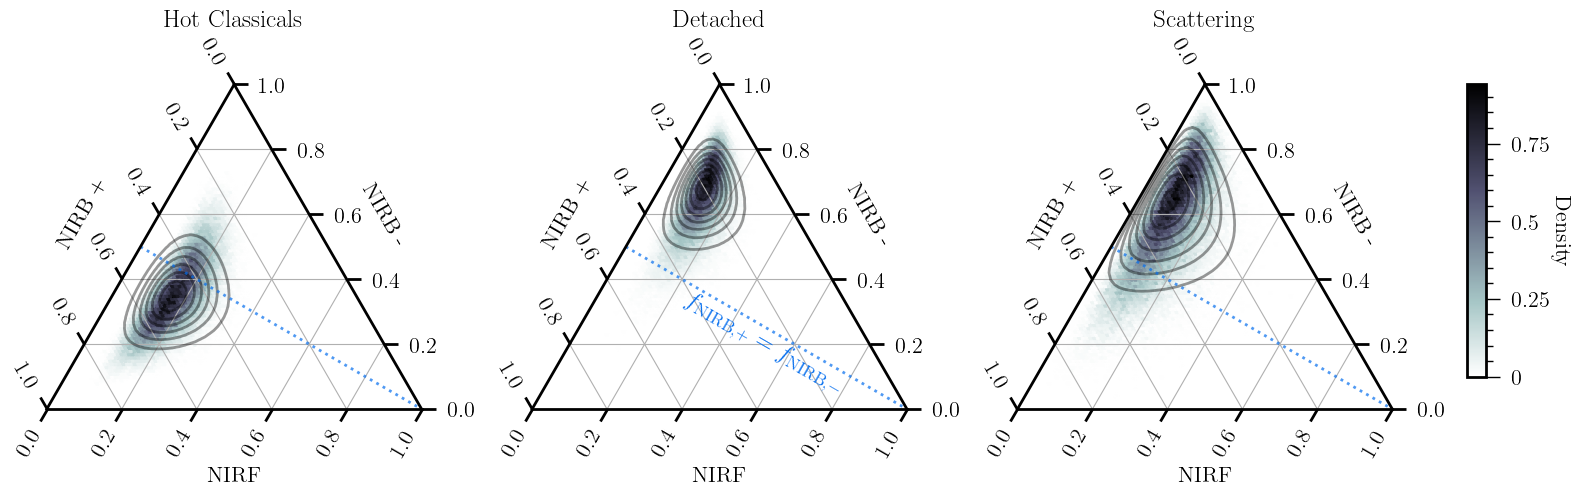

In [45]:
fig = pl.figure()


z = np.linspace(0,1, 100)
k = 1-z 

f = f_nirbsplit

titles = ['Hot Classicals', 'Detached', 'Scattering',]

pls = [1,2,3] #tricky indexing
print('Mean parameters:')
for i in [1,2,3]:
	f0 = f[:,3*i]
	f1 = f[:,3*i+1]
	f2 = f[:,3*i+2]
	summed = f0 + f1 + f2 
	f0 /= summed 
	f1 /= summed
	f2 /= summed 
	ax = fig.add_subplot(1,3,pls[i-1], projection='ternary')
	pc = ax.tribin(f0, f1, f2, cmap='bone_r')#,bins='log')
	ff = np.zeros((3, len(f))) 
	ff[0] = f0 
	ff[1] = f1 
	ff[2] = f2 
	means = dirichlet.mle(ff.T)
	print(titles[i-1], means/np.sum(means))
	if i < 4:
		t, l, r, v = get_dirichlet_pdfs(n=61, alpha=means)
		ax.tricontour(t, l, r, v, colors="k", alpha=0.4,)
  
	ax.plot(k/2, k/2, z, color='xkcd:cerulean blue', linestyle=':', alpha=0.7)

	ax.set_tlabel('NIRB -', fontsize=16)
	ax.set_llabel('NIRB +', fontsize=16)
	ax.set_rlabel('NIRF', fontsize=16)
	ax.tick_params(labelsize=16)
	ax.taxis.set_label_position('tick1')
	ax.laxis.set_label_position('tick1')
	ax.raxis.set_label_position('tick1')
	ax.grid()
	ax.set_title(titles[i-1], fontsize=18)
	if i == 2:
		ax.text(
		0.14,
		0.2,
		r'$f_{\mathrm{NIRB},+} = f_{\mathrm{NIRB},-}$',
		ha="center",
		va="center",
		transform=ax.transData, fontsize=18, rotation=330, color='xkcd:cerulean blue'
		)
cax = ax.inset_axes([1.2, 0.1, 0.05, 0.9], transform=ax.transAxes)
colorbar = fig.colorbar(pc, cax=cax, ticks=[0, 50, 100, 150, 200])
colorbar.set_label('Density', rotation=270, va="baseline", fontsize=16)
colorbar.ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1], fontsize=16)

fig.set_size_inches(16,12)

pl.tight_layout()

pl.show()

Mean parameters:
Classicals [0.10514242 0.268543   0.62631458]
CC [0.5338546  0.40897587 0.05716953]
Detached [0.08335077 0.26881373 0.6478355 ]
Scattering [0.15781064 0.2294079  0.61278146]


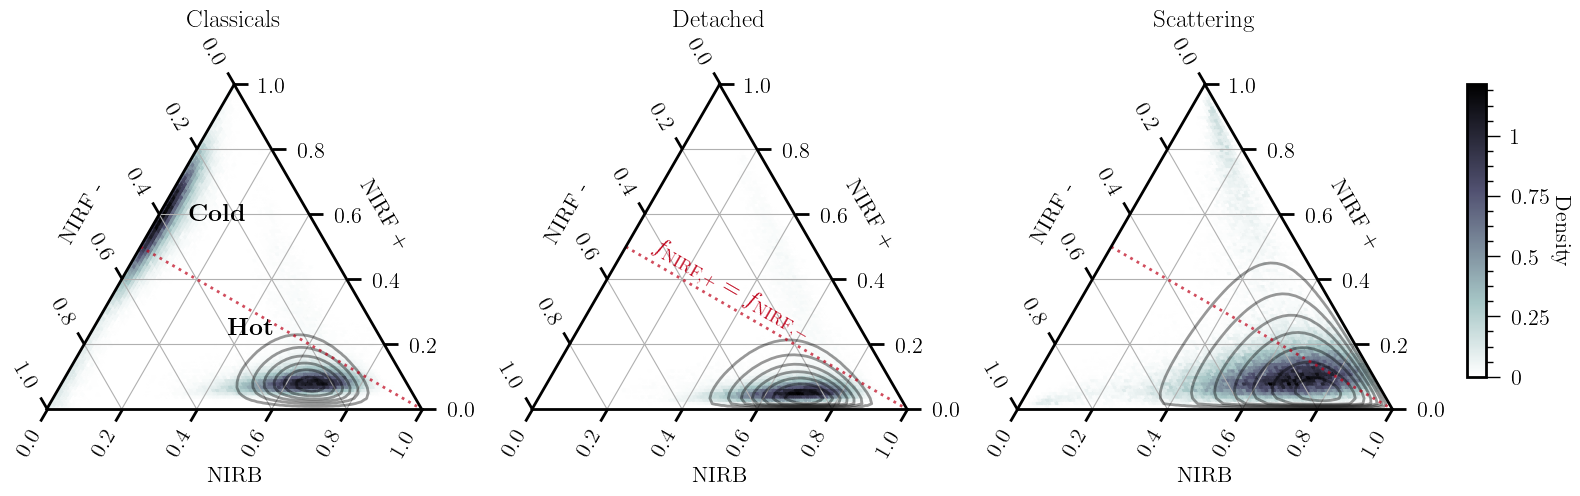

In [52]:
fig = pl.figure()


z = np.linspace(0,1, 100)
k = 1-z 

f = f_nirfsplit

titles = ['Classicals', 'Detached', 'Scattering',]

pls = [1,2,3]

print('Mean parameters:')

for i in [1,2,3]:
	f0 = f[:,3*i]
	f1 = f[:,3*i+1]
	f2 = f[:,3*i+2]
	summed = f0 + f1 + f2 
	f0 /= summed 
	f1 /= summed
	f2 /= summed 
	ax = fig.add_subplot(1,3,pls[i-1], projection='ternary')
	pc = ax.tribin(f0, f1, f2, cmap='bone_r')#,bins='log')
	ff = np.zeros((3, len(f))) 
	ff[0] = f0 
	ff[1] = f1 
	ff[2] = f2 
	means = dirichlet.mle(ff.T)
	print(titles[i-1], means/np.sum(means))
	if i == 1:
		ax.text(
			-0.05,
			0.60,
			r'\textbf{Cold}',
			ha="center",
			va="center",
			transform=ax.transData, fontsize=18, rotation=0)
  
		ax.text(
			0.05,
			0.25,
			r'\textbf{Hot}',
			ha="center",
			va="center",
			transform=ax.transData, fontsize=18, rotation=0)

	if i < 4:
		t, l, r, v = get_dirichlet_pdfs(n=61, alpha=means)
		ax.tricontour(t, l, r, v, colors="k", alpha=0.4)
  
	ax.plot(k/2, k/2, z, color='xkcd:scarlet', linestyle=':', alpha=0.7)
	
	if i == 1:
		f0 = f[:,0]
		f1 = f[:,1]
		f2 = f[:,2]
		summed = f0 + f1 + f2 
		f0 /= summed 
		f1 /= summed
		f2 /= summed 
		ff = np.zeros((3, len(f))) 
		ff[0] = f0 
		ff[1] = f1 
		ff[2] = f2 
		means = dirichlet.mle(ff.T)
		print('CC', means/np.sum(means))

		pc = ax.tribin(f0, f1, f2, cmap='bone_r', mincnt=1)#,bins='log')


	ax.set_tlabel('NIRF +', fontsize=16)
	ax.set_llabel('NIRF -', fontsize=16)
	ax.set_rlabel('NIRB', fontsize=16)
	ax.tick_params(labelsize=16)
	ax.taxis.set_label_position('tick1')
	ax.laxis.set_label_position('tick1')
	ax.raxis.set_label_position('tick1')
	ax.grid()
	ax.set_title(titles[i-1], fontsize=18)
	if i == 2:
		ax.text(
		0.04,
		0.37,
		r'$f_{\mathrm{NIRF},+} = f_{\mathrm{NIRF},-}$',
		ha="center",
		va="center",
		transform=ax.transData, fontsize=18, rotation=330, color='xkcd:scarlet'
		)
cax = ax.inset_axes([1.2, 0.1, 0.05, 0.9], transform=ax.transAxes)
colorbar = fig.colorbar(pc, cax=cax, ticks=[0, 40, 80, 120, 160])
colorbar.set_label('Density', rotation=270, va="baseline", fontsize=16)
colorbar.ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1], fontsize=16)

fig.set_size_inches(16,12)

pl.tight_layout()

pl.show()